## Load Libraries

In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv("Data/sales_data_sample.csv", encoding='ISO-8859-1')

In [3]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## Select only relevant columns

In [7]:
# Select only relevant columns

df = df[['ORDERNUMBER','PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'COUNTRY' ]]

In [12]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [10]:
df

,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,COUNTRY
0,10107,Motorcycles,30,95.70,2871.00,2003-02-24,USA
1,10121,Motorcycles,34,81.35,2765.90,2003-05-07,France
2,10134,Motorcycles,41,94.74,3884.34,2003-07-01,France
3,10145,Motorcycles,45,83.26,3746.70,2003-08-25,USA
4,10159,Motorcycles,49,100.00,5205.27,2003-10-10,USA
...,...,...,...,...,...,...,...
2818,10350,Ships,20,100.00,2244.40,2004-12-02,Spain
2819,10373,Ships,29,100.00,3978.51,2005-01-31,Finland
2820,10386,Ships,43,100.00,5417.57,2005-03-01,Spain
2821,10397,Ships,34,62.24,2116.16,2005-03-28,France


## Renaming columns

In [13]:
# Renaming columns

df.rename(columns={
    'ORDERNUMBER': 'order_number',
    'PRODUCTLINE': 'product_line',
    'QUANTITYORDERED': 'quantity',
    'PRICEEACH': 'price_each',
    'SALES': 'sales',
    'ORDERDATE': 'order_date',
    'COUNTRY': 'country'
}, inplace=True)


In [14]:
df

,order_number,product_line,quantity,price_each,sales,order_date,country
0,10107,Motorcycles,30,95.70,2871.00,2003-02-24,USA
1,10121,Motorcycles,34,81.35,2765.90,2003-05-07,France
2,10134,Motorcycles,41,94.74,3884.34,2003-07-01,France
3,10145,Motorcycles,45,83.26,3746.70,2003-08-25,USA
4,10159,Motorcycles,49,100.00,5205.27,2003-10-10,USA
...,...,...,...,...,...,...,...
2818,10350,Ships,20,100.00,2244.40,2004-12-02,Spain
2819,10373,Ships,29,100.00,3978.51,2005-01-31,Finland
2820,10386,Ships,43,100.00,5417.57,2005-03-01,Spain
2821,10397,Ships,34,62.24,2116.16,2005-03-28,France


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_number  2823 non-null   int64         
 1   product_line  2823 non-null   object        
 2   quantity      2823 non-null   int64         
 3   price_each    2823 non-null   float64       
 4   sales         2823 non-null   float64       
 5   order_date    2823 non-null   datetime64[ns]
 6   country       2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 154.5+ KB


## Create connection

In [16]:
# Create connection
conn = sqlite3.connect("sales_data.db")

## Save dataframe as SQL table

In [17]:
# Save dataframe as SQL table
df.to_sql("sales", conn, if_exists="replace", index=False)


2823

In [41]:
# List all tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in DB:", tables)

Tables in DB: [('sales',)]


In [48]:
# View table structure
cursor.execute("PRAGMA table_info(sales);")
columns = cursor.fetchall()

# Pretty print the schema
print("Schema for 'sales' table:")
for col in columns:
    print(f"{col[1]} ({col[2]})")

Schema for 'sales' table:
order_number (INTEGER)
product_line (TEXT)
quantity (INTEGER)
price_each (REAL)
sales (REAL)
order_date (TIMESTAMP)
country (TEXT)


In [56]:
# Fetch the rows
df_sales = pd.read_sql_query("SELECT * FROM sales;", conn)
print(df_sales)

      order_number product_line  quantity  price_each    sales  \
0            10107  Motorcycles        30       95.70  2871.00   
1            10121  Motorcycles        34       81.35  2765.90   
2            10134  Motorcycles        41       94.74  3884.34   
3            10145  Motorcycles        45       83.26  3746.70   
4            10159  Motorcycles        49      100.00  5205.27   
...            ...          ...       ...         ...      ...   
2818         10350        Ships        20      100.00  2244.40   
2819         10373        Ships        29      100.00  3978.51   
2820         10386        Ships        43      100.00  5417.57   
2821         10397        Ships        34       62.24  2116.16   
2822         10414        Ships        47       65.52  3079.44   

               order_date  country  
0     2003-02-24 00:00:00      USA  
1     2003-05-07 00:00:00   France  
2     2003-07-01 00:00:00   France  
3     2003-08-25 00:00:00      USA  
4     2003-10-10 00:00

## Queries and Visuals

### Total Revenue and Quantity

In [60]:
query = """
SELECT 
    SUM(quantity) AS total_quantity, 
    SUM(sales) AS total_revenue 
FROM sales
"""
result = pd.read_sql_query(query, conn)
print(result)

   total_quantity  total_revenue
0           99067    10032628.85


### Revenue by Country

In [65]:
query = """
SELECT country, SUM(sales) AS total_sales
FROM sales
GROUP BY country
ORDER BY total_sales DESC
"""
df_country_sales = pd.read_sql_query(query, conn)
print(df_country_sales)


        country  total_sales
0           USA   3627982.83
1         Spain   1215686.92
2        France   1110916.52
3     Australia    630623.10
4            UK    478880.46
5         Italy    374674.31
6       Finland    329581.91
7        Norway    307463.70
8     Singapore    288488.41
9       Denmark    245637.15
10       Canada    224078.56
11      Germany    220472.09
12       Sweden    210014.21
13      Austria    202062.53
14        Japan    188167.81
15  Switzerland    117713.56
16      Belgium    108412.62
17  Philippines     94015.73
18      Ireland     57756.43


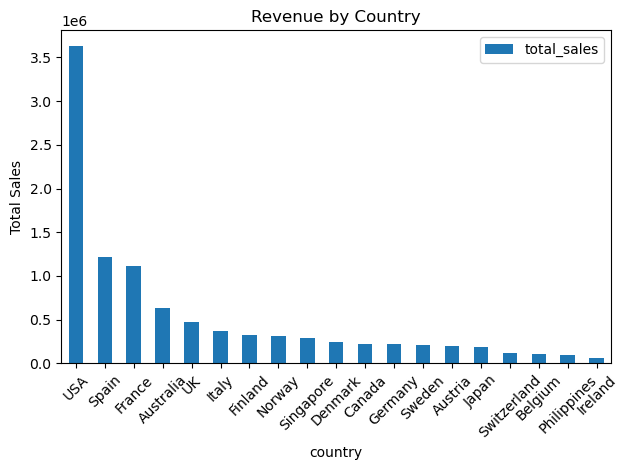

In [71]:
df_country_sales.plot(kind='bar', x='country', y='total_sales', title='Revenue by Country')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue by Product Line

In [76]:
query = """
SELECT product_line, SUM(sales) AS total_sales
FROM sales
GROUP BY product_line
"""
df_revenue = pd.read_sql_query(query, conn)
print(df_revenue)


       product_line  total_sales
0      Classic Cars   3919615.66
1       Motorcycles   1166388.34
2            Planes    975003.57
3             Ships    714437.13
4            Trains    226243.47
5  Trucks and Buses   1127789.84
6      Vintage Cars   1903150.84


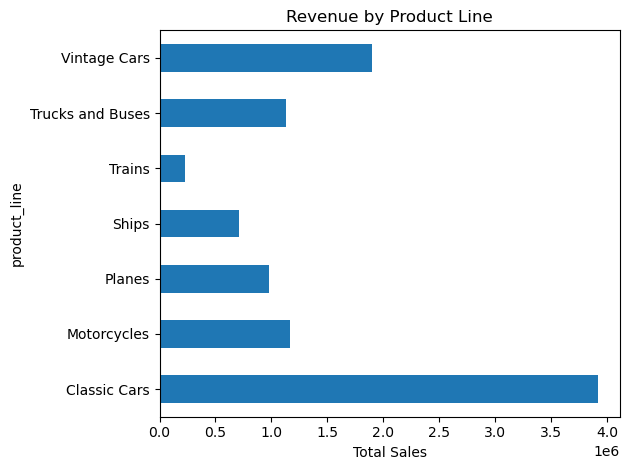

In [78]:
df_revenue.plot(kind='barh', x='product_line', y='total_sales', legend=False)
plt.title("Revenue by Product Line")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

### Monthly Sales Trend

In [80]:
query = """
SELECT 
    SUBSTR(order_date, 1, 7) AS month, 
    SUM(sales) AS total_sales
FROM sales
GROUP BY month
ORDER BY month
"""
df_monthly = pd.read_sql_query(query, conn)
print(df_monthly)


      month  total_sales
0   2003-01    129753.60
1   2003-02    140836.19
2   2003-03    174504.90
3   2003-04    201609.55
4   2003-05    192673.11
5   2003-06    168082.56
6   2003-07    187731.88
7   2003-08    197809.30
8   2003-09    263973.36
9   2003-10    568290.97
10  2003-11   1029837.66
11  2003-12    261876.46
12  2004-01    316577.42
13  2004-02    311419.53
14  2004-03    205733.73
15  2004-04    206148.12
16  2004-05    273438.39
17  2004-06    286674.22
18  2004-07    327144.09
19  2004-08    461501.27
20  2004-09    320750.91
21  2004-10    552924.25
22  2004-11   1089048.01
23  2004-12    372802.66
24  2005-01    339543.42
25  2005-02    358186.18
26  2005-03    374262.76
27  2005-04    261633.29
28  2005-05    457861.06


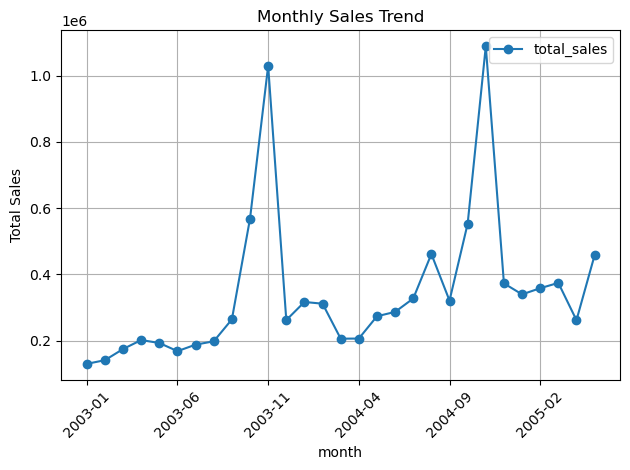

In [83]:
df_monthly.plot(kind='line', x='month', y='total_sales', marker='o', title='Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Order Value by Product Line

In [87]:
query = """
SELECT 
    product_line,
    AVG(sales) AS avg_order_value
FROM sales
GROUP BY product_line
ORDER BY avg_order_value DESC
"""
df_aov = pd.read_sql_query(query, conn)
print(df_aov)

       product_line  avg_order_value
0      Classic Cars      4053.377104
1  Trucks and Buses      3746.810100
2       Motorcycles      3523.831843
3            Planes      3186.286176
4      Vintage Cars      3135.339110
5             Ships      3053.150128
6            Trains      2938.226883


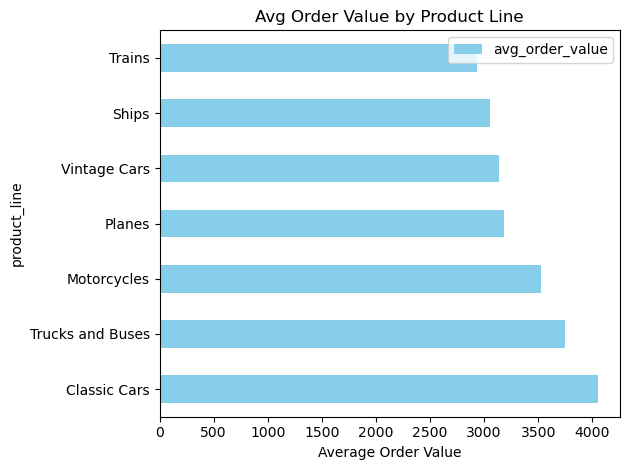

In [89]:
df_aov.plot(kind='barh', x='product_line', y='avg_order_value', color='skyblue', title='Avg Order Value by Product Line')
plt.xlabel("Average Order Value")
plt.tight_layout()
plt.show()


### Most Frequently Ordered Product Line

In [92]:
query = """
SELECT 
    product_line, 
    COUNT(*) AS order_count
FROM sales
GROUP BY product_line
ORDER BY order_count DESC
"""
df_freq = pd.read_sql_query(query, conn)
print(df_freq)

       product_line  order_count
0      Classic Cars          967
1      Vintage Cars          607
2       Motorcycles          331
3            Planes          306
4  Trucks and Buses          301
5             Ships          234
6            Trains           77


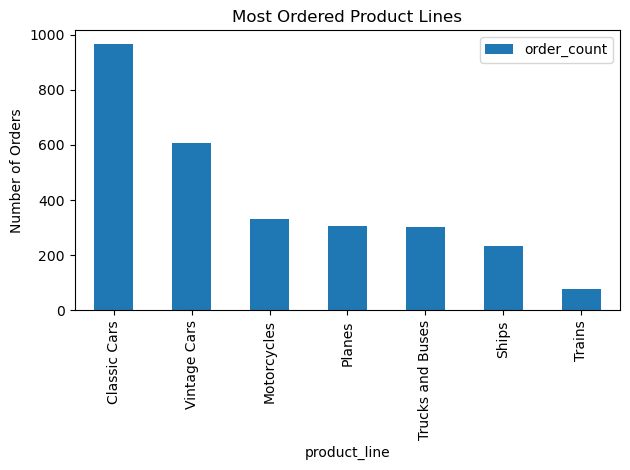

In [94]:
df_freq.plot(kind='bar', x='product_line', y='order_count', title='Most Ordered Product Lines')
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


### Country-wise Average Sale per Order

In [98]:
query = """
SELECT 
    country, 
    COUNT(*) AS total_orders,
    SUM(sales) AS total_sales,
    ROUND(SUM(sales) / COUNT(*), 2) AS avg_sale_per_order
FROM sales
GROUP BY country
ORDER BY avg_sale_per_order DESC

"""
df_avg_sale = pd.read_sql_query(query, conn)
print(df_avg_sale)

        country  total_orders  total_sales  avg_sale_per_order
0       Denmark            63    245637.15             3899.00
1   Switzerland            31    117713.56             3797.21
2        Sweden            57    210014.21             3684.46
3       Austria            55    202062.53             3673.86
4     Singapore            79    288488.41             3651.75
5         Japan            52    188167.81             3618.61
6        Norway            85    307463.70             3617.22
7   Philippines            26     94015.73             3615.99
8           USA          1004   3627982.83             3613.53
9       Ireland            16     57756.43             3609.78
10      Finland            92    329581.91             3582.41
11      Germany            62    220472.09             3556.00
12        Spain           342   1215686.92             3554.64
13       France           314   1110916.52             3537.95
14    Australia           185    630623.10             

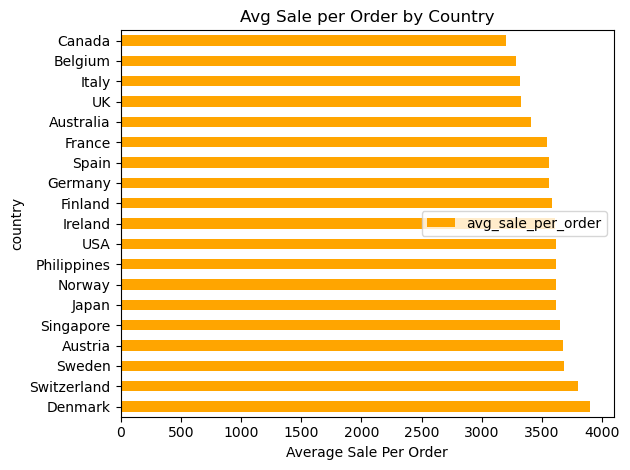

In [101]:
df_avg_sale.plot(kind='barh', x='country', y='avg_sale_per_order', color='orange', title='Avg Sale per Order by Country')
plt.xlabel("Average Sale Per Order")
plt.tight_layout()
plt.show()